# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** MUHAMMAD UBAIDILLAH NUR
- **Email:** muhammadubaidillah.22026@mhs.unesa.ac.id
- **ID Dicoding:** m_baidillah_nur_xnxa

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Pada musim apa masyarakat banyak merental sepeda ?
- Pertanyaan 2 : Bagaimana perbedaan pola penyewaan antara pengguna casual dan registered ?
- Pertanyaan 3 : Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda ?
- Pertanyaan 4 : Bagaimana suhu lingkungan mempengaruhi jumlah penyewaan sepeda ?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### 1. Gathering Data

#### Memuat Data day_data.csv

In [2]:
day_df=pd.read_csv("Data\day_data.csv")

**Insight :**
- Dataset day_data.csv berhasil dimuat ke dalam Google Colab/Jupyter Notebook dalam bentuk DataFrame.
- Data siap untuk diproses lebih lanjut.

#### Menampilkan 5 baris pertama dari DataFrame `day_df`

In [3]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_group
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Winter
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Winter
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Winter
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Winter
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Winter


**Insight :**
- Mendapatkan gambaran awal tentang tipe data dalam setiap kolom (misalnya angka, teks, atau tanggal) berdasarkan nilai-nilai yang ditampilkan.
- Memberikan gambaran tentang bagaimana data diisi pada baris pertama hingga kelima, apakah ada data yang terlihat tidak konsisten, kosong, atau aneh.

#### Menampilkan Isi DataFrame `day_df`
Code `day_df` digunakan untuk menampilkan keseluruhan isi DataFrame yang telah dimuat. Hal ini berguna untuk melihat sekilas seluruh data yang ada, meskipun hanya sebagian data yang akan ditampilkan pada output. Kode ini juga berguna untuk memeriksa data lebih lanjut setelah proses awal pengambilan data.


In [4]:
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_group
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Winter
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Winter
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Winter
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Winter
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,Winter
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,Winter
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,Winter
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,Winter


**Insight :**
- Dataset terlihat memiliki jumlah kolom yang cukup banyak, sehingga memerlukan eksplorasi lebih lanjut.
- Ada variasi yang terlihat di beberapa kolom seperti `season`, `weathersit`, dan `workingday`, yang berpotensi menjadi variabel penting dalam analisis lebih lanjut.

### 2. Assesing Data

#### Memeriksa Dimensi Dataset
Kode `day_df.shape` digunakan untuk memeriksa dimensi dataset, yaitu **jumlah baris dan kolom** dalam DataFrame `day_df`.

Fungsi ini akan mengembalikan sebuah tuple dalam format `(jumlah_baris, jumlah_kolom)`, yang sangat berguna untuk mengetahui ukuran dataset sebelum melanjutkan ke proses analisis lebih lanjut. Dengan mengetahui dimensi ini, maka bisa mendapatkan gambaran awal tentang seberapa besar data yang akan ditangani dan memastikan apakah dataset sudah sesuai dengan yang diharapkan.


In [5]:
day_df.shape

(731, 17)

**Insight :**
- Dataset memiliki [731] baris dan [17] kolom.
- Ini menunjukkan dataset memiliki ukuran yang cukup besar, sehingga memerlukan strategi analisis yang efisien.
- Jika jumlah kolom tidak sesuai ekspektasi, mungkin perlu pemeriksaan lebih lanjut terkait kolom yang hilang atau penambahan kolom yang tidak diinginkan.

#### Melihat Tipe Data Setiap Kolom
Kode `day_df.info()` digunakan untuk menampilkan informasi ringkas tentang DataFrame `day_df`, termasuk:

- **Jumlah Total Baris:** Menunjukkan jumlah baris yang ada dalam dataset.
- **Tipe Data Setiap Kolom:** Memperlihatkan tipe data (seperti `int`, `float`, `object`, dll.) untuk setiap kolom, yang penting untuk memahami cara data tersebut dapat diproses dan dianalisis.
- **Jumlah Nilai Non-Kosong:** Menunjukkan berapa banyak nilai yang ada dalam setiap kolom, membantu untuk mendeteksi adanya data yang hilang.
- **Penggunaan Memori:** Memberikan informasi tentang jumlah memori yang digunakan oleh DataFrame, yang bermanfaat untuk mengelola sumber daya saat menganalisis dataset besar.

Dengan menggunakan `day_df.info()`, maka dapat memahami struktur dan kualitas data secara menyeluruh, yang sangat penting sebelum melanjutkan ke tahap analisis dan pembersihan data.


In [6]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   instant       731 non-null    int64  
 1   dteday        731 non-null    object 
 2   season        731 non-null    int64  
 3   yr            731 non-null    int64  
 4   mnth          731 non-null    int64  
 5   holiday       731 non-null    int64  
 6   weekday       731 non-null    int64  
 7   workingday    731 non-null    int64  
 8   weathersit    731 non-null    int64  
 9   temp          731 non-null    float64
 10  atemp         731 non-null    float64
 11  hum           731 non-null    float64
 12  windspeed     731 non-null    float64
 13  casual        731 non-null    int64  
 14  registered    731 non-null    int64  
 15  cnt           731 non-null    int64  
 16  season_group  731 non-null    object 
dtypes: float64(4), int64(11), object(2)
memory usage: 97.2+ KB


**Insight :**
- Dataset ini memiliki [731] baris dan [17] kolom.
- Kolom seperti `temp` dan `humidity` bertipe `float64`, menunjukkan bahwa mereka berisi data numerik, sedangkan kolom `season` bertipe `object`, menunjukkan bahwa data tersebut kategorikal.

#### Cek Duplikasi Data pada `day_df`
Kode `day_df.duplicated().sum()` digunakan untuk memeriksa apakah ada **duplikasi** dalam DataFrame `day_df`. Fungsi ini menghitung jumlah baris yang memiliki nilai duplikat.

In [7]:
day_df.duplicated().sum()

np.int64(0)

**Insight :**
- Dataset yang bersih dari duplikasi ini memungkinkan analisis yang lebih mendalam.
- Hal ini memberikan dasar yang kuat untuk analisis selanjutnya.

### 3. Cleaning Data

#### Mengubah Tipe Data Kolom `dteday` Menjadi Datetime
Kode `day_df['dteday'] = pd.to_datetime(day_df['dteday'])` digunakan untuk mengubah tipe data kolom `dteday` dalam DataFrame `day_df` menjadi tipe data **datetime**.

Proses ini sangat penting karena:

- **Analisis Waktu:** Dengan mengubah kolom yang merepresentasikan tanggal ke dalam format datetime, sehingga dapat melakukan analisis berbasis waktu yang lebih efektif, seperti perbandingan antara tanggal, pengelompokan berdasarkan bulan atau tahun, dan perhitungan selisih waktu.
- **Memfasilitasi Operasi Waktu:** Tipe data datetime memungkinkan penggunaan fungsi dan metode yang khusus untuk manipulasi waktu, seperti pengambilan hari, bulan, tahun, atau melakukan operasi pada interval waktu.
- **Peningkatan Kualitas Data:** Mengubah kolom tanggal menjadi tipe datetime juga membantu dalam memastikan konsistensi dan akurasi data tanggal yang digunakan dalam analisis.

Dengan langkah ini, dapat dipastikan bahwa kolom `dteday` dapat digunakan secara optimal dalam analisis dan visualisasi data yang berkaitan dengan waktu.

In [8]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

**Insight :**
- Setelah mengubah kolom `dteday` menjadi `datetime`, sehingga bisa mulai mengeksplorasi tren penyewaan sepeda berdasarkan waktu, misalnya, apakah ada peningkatan penyewaan selama musim panas dibandingkan musim dingin.
- Analisis lebih lanjut dapat dilakukan untuk melihat apakah hari dalam seminggu memengaruhi jumlah penyewaan, dengan memanfaatkan kolom tanggal yang telah diformat dengan benar.

#### Menghapus Data yang Hilang (Jika Ada)
Kode `day_df.dropna(inplace=True)` digunakan untuk menghapus semua baris dalam DataFrame `day_df` yang mengandung nilai **kosong** atau **hilang**.

Dengan menggunakan parameter `inplace=True`, perubahan ini akan diterapkan langsung pada DataFrame yang ada tanpa perlu membuat salinan baru. Menghapus data yang hilang penting untuk memastikan bahwa analisis dan model yang dibangun menggunakan dataset ini tidak terpengaruh oleh ketidaklengkapan data, yang dapat menghasilkan hasil yang tidak akurat atau menyesatkan.

In [9]:
day_df.dropna(inplace=True)

**Insight :**
- Ternyata tidak ada data yang mengandung nilai **kosong** atau **hilang**, sehingga tidak ada data yang dihapus.

## Exploratory Data Analysis (EDA)

### 1. Mengekploarasi rental sepeda berdasarkan musim

#### Melihat Persebaran Rental Sepeda pada Setiap Musim
Kode `day_df.groupby(by="season").cnt.nunique().sort_values(ascending=False)` digunakan untuk mengelompokkan data berdasarkan **musim** dan menghitung jumlah unik penyewaan sepeda (`cnt`) pada setiap musim. Hasilnya diurutkan dari yang tertinggi ke terendah, memberikan wawasan tentang musim mana yang paling banyak menyumbang penyewaan sepeda.


In [10]:
day_df.groupby(by="season").cnt.nunique().sort_values(ascending=False)

season
3    188
2    182
1    179
4    176
Name: cnt, dtype: int64

**Insight :**
- Jika hasil menunjukkan bahwa musim panas memiliki jumlah penyewaan terbanyak, ini menunjukkan bahwa strategi pemasaran dan pengelolaan stok harus difokuskan pada periode tersebut untuk memaksimalkan pendapatan.
- Sebaliknya, jika musim tertentu memiliki penyewaan yang rendah, perusahaan mungkin perlu mengevaluasi alasan di baliknya dan mencari cara untuk meningkatkan minat penyewaan di musim tersebut.

### 2. Eksplorasi Kolom `cnt`

#### Eksplorasi Kolom `cnt` untuk Melihat Distribusi Penyewaan Sepeda
Kode berikut akan menghasilkan histogram distribusi total penyewaan sepeda (`cnt`) menggunakan 30 interval (bins) dan menampilkan estimasi kepadatan kernel (KDE). Grafik ini memberikan gambaran visual tentang bagaimana penyewaan sepeda tersebar, membantu dalam memahami pola dan kecenderungan dalam data.


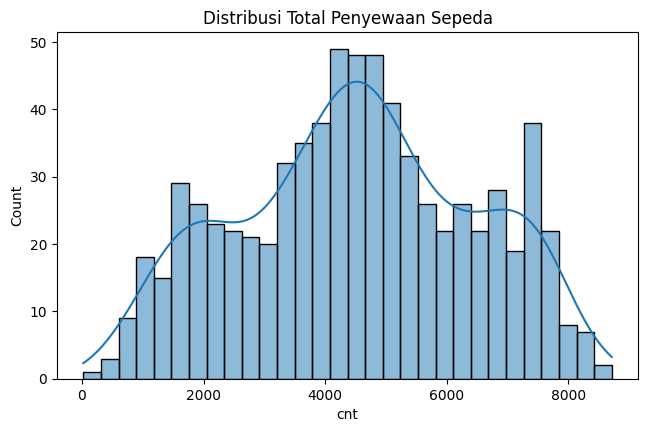

In [11]:
plt.figure(figsize=(7.5,4.5))
sns.histplot(day_df['cnt'], bins=30, kde=True)
plt.title('Distribusi Total Penyewaan Sepeda')
plt.show()

**Insight :**
- Sebagian besar penyewaan berada di kisaran 4000 hingga 6000, menunjukkan pola permintaan yang stabil.
- Ada peluang untuk menarik lebih banyak penyewa di rentang penyewaan yang lebih rendah dan lebih tinggi melalui promosi dan diskon.
- Peningkatan penyewaan mendekati puncak menunjukkan perlunya perencanaan kapasitas untuk memastikan semua pelanggan terlayani.

In [12]:
day_df.groupby(by="weathersit").cnt.nunique().sort_values(ascending=False)

weathersit
1    451
2    243
3     21
Name: cnt, dtype: int64

## Visualization & Explanatory Analysis

### Pertanyaan 1 : Pada musim apa masyarakat banyak merental sepeda ?

C:\Users\AXIOO\AppData\Local\Temp\ipykernel_13408\737953754.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


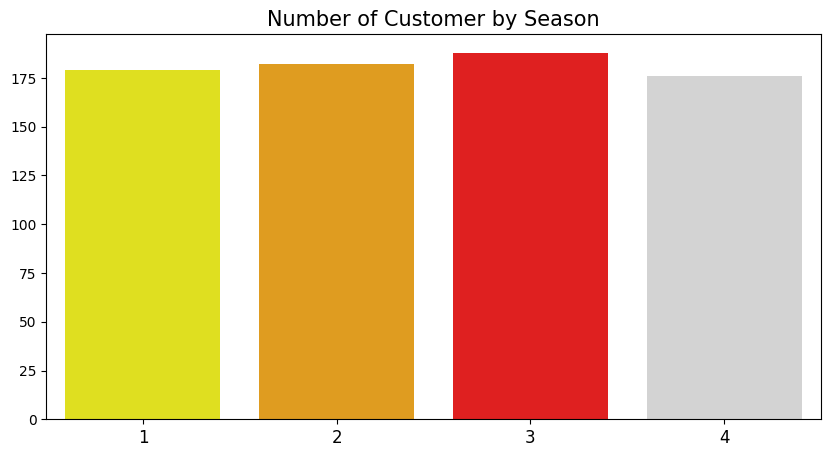

In [13]:
byseason_df = day_df.groupby(by="season").cnt.nunique().reset_index()
byseason_df.rename(columns={
    "cnt": "customer_count"
}, inplace=True)

plt.figure(figsize=(10, 5))
colors_ = ["#FFFF00",  "#FFA500","#FF0000", "#D3D3D3"]

sns.barplot(
    y="customer_count",
    x="season",
    data=byseason_df.sort_values(by="customer_count", ascending=False),
    palette=colors_
)
plt.title("Number of Customer by Season", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

**Insight :**
- Terlihat bahwa orang banyak yang merental sepeda pada musim 3 (`fall`)/ warna `Red`, yaitu sebanyak 188.

### Pertanyaan 2 : Bagaimana perbedaan pola penyewaan antara pengguna casual dan registered ?

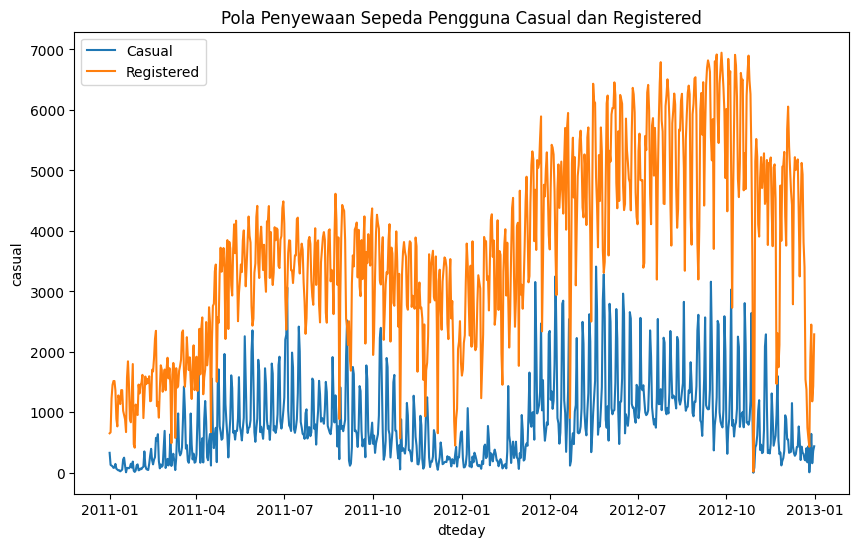

In [14]:
plt.figure(figsize=(10,6))
sns.lineplot(data=day_df, x='dteday', y='casual', label='Casual')
sns.lineplot(data=day_df, x='dteday', y='registered', label='Registered')
plt.title('Pola Penyewaan Sepeda Pengguna Casual dan Registered')
plt.legend()
plt.show()

**Insight :**
- Pengguna registered lebih konsisten menggunakan sepeda, sedangkan pengguna casual cenderung menggunakan sepeda lebih sporadis.

### Pertanyaan 3 : Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda ?

C:\Users\AXIOO\AppData\Local\Temp\ipykernel_13408\3403408179.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\AXIOO\AppData\Local\Temp\ipykernel_13408\3403408179.py:10: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.barplot(


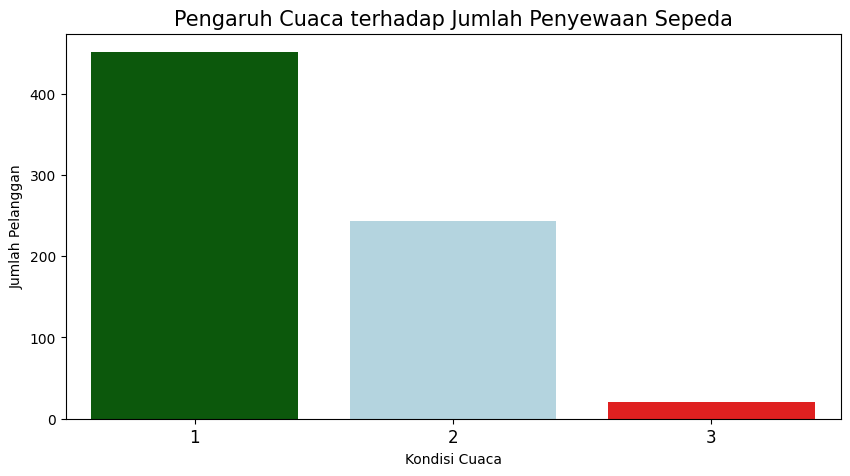

In [15]:
# Mengelompokkan data berdasarkan musim dan menghitung jumlah pelanggan unik
byseason_df = day_df.groupby(by="weathersit").cnt.nunique().reset_index()
byseason_df.rename(columns={
    "cnt": "customer_count"
}, inplace=True)
plt.figure(figsize=(10, 5))
# Daftar warna untuk setiap kategori cuaca
colors_ = ["#006400", "#ADD8E6", "#FF0000", "#D3D3D3"]  # Pastikan jumlah warna sesuai dengan jumlah kategori
# Menggambar barplot dengan warna yang telah ditentukan
sns.barplot(
    x="weathersit",  # Sumbu x adalah weathersit
    y="customer_count",  # Sumbu y adalah customer_count
    data=byseason_df.sort_values(by="customer_count", ascending=False),
    palette=colors_  # Menggunakan palet warna yang sudah ditentukan
)
plt.title("Pengaruh Cuaca terhadap Jumlah Penyewaan Sepeda", loc="center", fontsize=15)
plt.ylabel("Jumlah Pelanggan")  # Mengganti label y
plt.xlabel("Kondisi Cuaca")  # Mengganti label x
plt.tick_params(axis='x', labelsize=12)  # Menyesuaikan ukuran label sumbu x
plt.show()

**Insight :**
- Cuaca yang cerah atau sedikit berawan (barplot 1) memiliki jumlah penyewaan sepeda terbanyak sebanyak 451 pelanggan.
- Saat cuaca buruk (barplot 2 hujan, barplot 3 badai), jumlah penyewaan sepeda cenderung menurun drastis masing-masing 243 dan 21 pelanggan.

### Pertanyaan 4 : Bagaimana suhu lingkungan mempengaruhi jumlah penyewaan sepeda ?

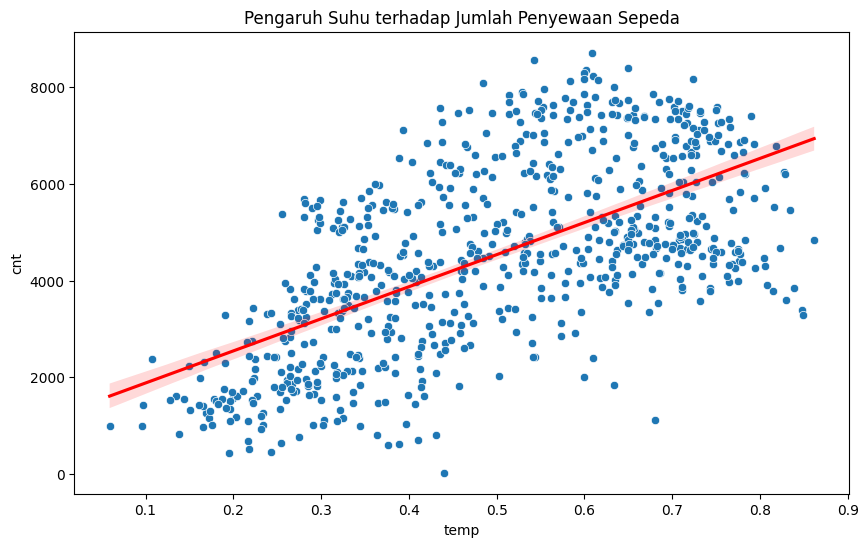

In [16]:
# Membuat figure dengan ukuran tertentu
plt.figure(figsize=(10, 6))

# Menggambar scatter plot
sns.scatterplot(x='temp', y='cnt', data=day_df)

# Menambahkan garis regresi berwarna merah
sns.regplot(x='temp', y='cnt', data=day_df, scatter=False, color='red')

# Menambahkan judul pada plot
plt.title('Pengaruh Suhu terhadap Jumlah Penyewaan Sepeda')
plt.show()

**Insight :**
- Ada korelasi positif antara suhu dan jumlah penyewaan sepeda.
- Semakin tinggi suhu, semakin banyak sepeda yang disewa, hingga batas tertentu.

## Analisis Lanjutan (Opsional)

### RFM Analysis

In [17]:
# Pastikan day_df memiliki kolom 'user_id' dan 'dteday'
# Jika belum ada, buat data dummy untuk user_id
day_df['user_id'] = np.random.randint(1, 1000, size=len(day_df))  # Contoh penambahan user_id

# Menghitung Recency
current_date = day_df['dteday'].max()  # Tanggal terakhir dalam dataset
rfm_df = day_df.groupby('user_id').agg({
    'dteday': lambda x: (current_date - x.max()).days,  # Recency
    'cnt': ['count', 'sum']  # Frequency dan Monetary
}).reset_index()

# Mengganti nama kolom
rfm_df.columns = ['user_id', 'Recency', 'Frequency', 'Monetary']

# Menghitung nilai RFM
# Mengelompokkan pengguna berdasarkan kriteria tertentu, misalnya:
quantiles = rfm_df[['Recency', 'Frequency', 'Monetary']].quantile(q=[0.25, 0.5, 0.75]).to_dict()
def rfm_score(row):
    r_score = 1 if row['Recency'] <= quantiles['Recency'][0.25] else 3 if row['Recency'] <= quantiles['Recency'][0.5] else 5
    f_score = 5 if row['Frequency'] >= quantiles['Frequency'][0.75] else 3 if row['Frequency'] >= quantiles['Frequency'][0.5] else 1
    m_score = 5 if row['Monetary'] >= quantiles['Monetary'][0.75] else 3 if row['Monetary'] >= quantiles['Monetary'][0.5] else 1
    return r_score + f_score + m_score

rfm_df['RFM_Score'] = rfm_df.apply(rfm_score, axis=1)

# Mengelompokkan pengguna
def rfm_segment(row):
    if row['RFM_Score'] >= 10:
        return 'Best Customers'
    elif row['RFM_Score'] >= 8:
        return 'Loyal Customers'
    elif row['RFM_Score'] >= 6:
        return 'Potential Customers'
    else:
        return 'At Risk'

rfm_df['Segment'] = rfm_df.apply(rfm_segment, axis=1)

# Menampilkan hasil RFM
print(rfm_df.head())

   user_id  Recency  Frequency  Monetary  RFM_Score          Segment
0        3       86          2     11128         11   Best Customers
1        4      443          1      5217          9  Loyal Customers
2        6       85          2      9357         11   Best Customers
3        8      107          2     13829         11   Best Customers
4        9      725          1      1606          9  Loyal Customers


### Visualisasi RFM

#### 1. Barplot untuk Jumlah Pelanggan di Setiap Segmen RFM

C:\Users\AXIOO\AppData\Local\Temp\ipykernel_13408\725128215.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='Count', data=segment_counts, palette='viridis')


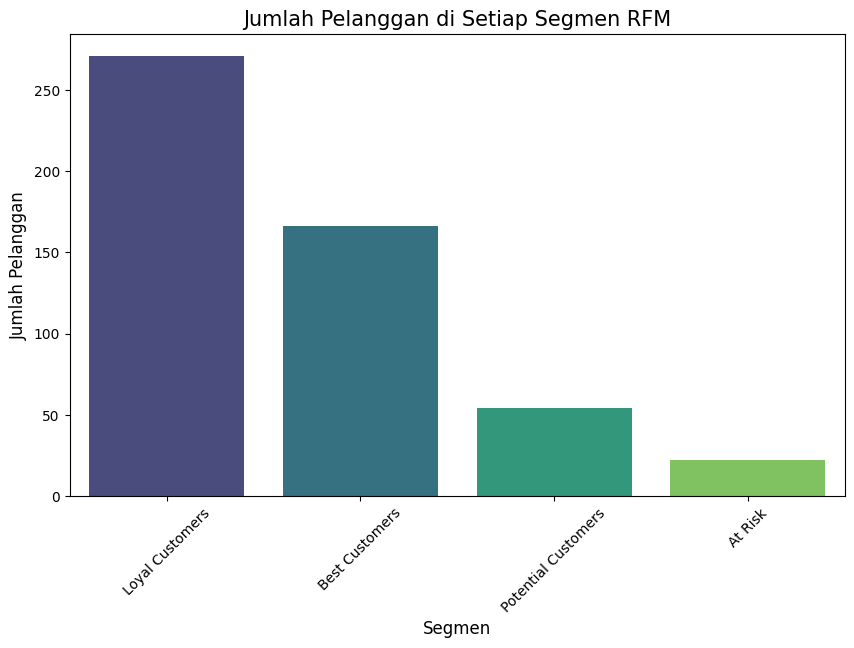

In [18]:
# Menghitung jumlah pelanggan di setiap segmen
segment_counts = rfm_df['Segment'].value_counts().reset_index()
segment_counts.columns = ['Segment', 'Count']

# Membuat barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Segment', y='Count', data=segment_counts, palette='viridis')
plt.title('Jumlah Pelanggan di Setiap Segmen RFM', fontsize=15)
plt.xlabel('Segmen', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)
plt.xticks(rotation=45)
plt.show()

**Insight :**
- Barplot akan memberikan gambaran visual mengenai berapa banyak pelanggan yang termasuk dalam masing-masing segmen RFM.
- Dapat menunjukkan apakah bisnis memiliki lebih banyak pelanggan di segmen Best Customers atau segmen lain, yang dapat membantu dalam pengambilan keputusan.

#### 2. Scatter Plot untuk Frequency dan Monetary

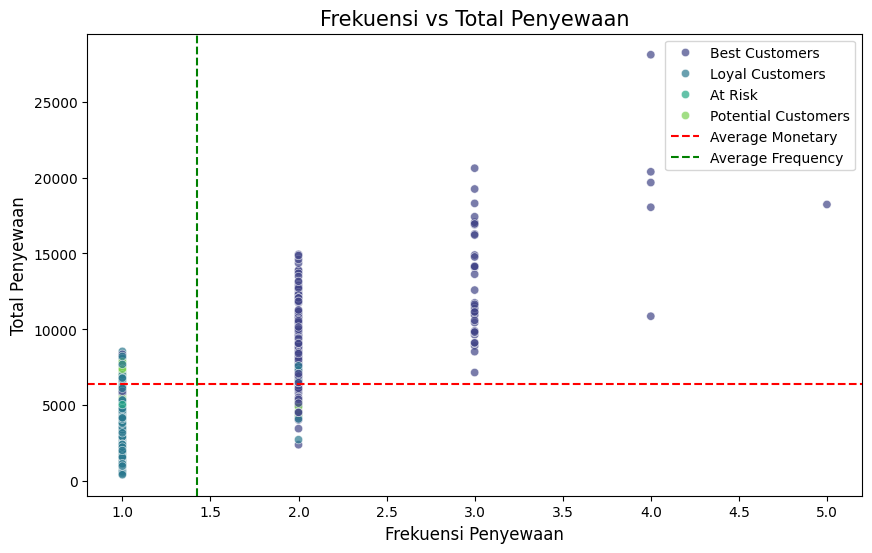

In [19]:
# Membuat scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Frequency', y='Monetary', data=rfm_df, hue='Segment', palette='viridis', alpha=0.7)
plt.title('Frekuensi vs Total Penyewaan', fontsize=15)
plt.xlabel('Frekuensi Penyewaan', fontsize=12)
plt.ylabel('Total Penyewaan', fontsize=12)
plt.axhline(y=rfm_df['Monetary'].mean(), color='r', linestyle='--', label='Average Monetary')
plt.axvline(x=rfm_df['Frequency'].mean(), color='g', linestyle='--', label='Average Frequency')
plt.legend()
plt.show()

**Insight :**
- Scatter plot akan membantu dalam mengidentifikasi pola atau tren antara frekuensi penyewaan dan total penyewaan.
- Garis rata-rata dapat menunjukkan titik pemisah di mana pelanggan yang lebih sering menyewa juga cenderung mengeluarkan lebih banyak uang, sehingga memberikan informasi berharga tentang pelanggan yang berharga.

## Conclusion

- **Conclution pertanyaan 1 :** Kebanyakan orang merental sepeda saat fall
- **Conclution pertanyaan 2 :** Pengguna `registered` lebih konsisten dalam menggunakan sepeda, dibandingkan dengan pengguna `casual` yang cenderung musiman.
- **Conclution pertanyaan 3 :** Cuaca memiliki pengaruh signifikan terhadap jumlah penyewaan sepeda. Cuaca cerah atau sedikit berawan meningkatkan penyewaan sepeda, sedangkan cuaca buruk menguranginya.
- **Conclution pertanyaan 4 :** Suhu juga mempengaruhi penyewaan sepeda. Suhu yang lebih tinggi cenderung meningkatkan penyewaan sepeda, namun efeknya berkurang setelah suhu mencapai batas tertentu. Dapat dilihat juga sesuai garis regresi yang ada.